# Regression Pipeline for Medical Insurance Dataset

Ridge, Lasso, SGD Regressor, Linear Regression, Polynomial Regression, Elastic Net Regression

## Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the Dataset

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "insurance.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mirichoi0218/insurance",
  file_path,
)

df.head()

/tmp/ipython-input-893969974.py:6: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'insurance' dataset.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Pre Processing

Converting cateogorical data into one hot encoding

In [ ]:
encoded_df = pd.get_dummies(df, columns=["sex", 'smoker', 'region'])
encoded_df = encoded_df.astype(int)
encoded_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0


## Train-Val-Test Split

Splitting data into 0.6:0.2:0.2

In [ ]:
from sklearn.model_selection import train_test_split

X = encoded_df.drop(columns=["charges"]) # weights
y = encoded_df["charges"] # values


X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, random_state=42
)

X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
40,24,26,0,1,0,1,0,1,0,0,0
994,27,20,3,1,0,0,1,0,1,0,0
165,47,28,4,0,1,1,0,1,0,0,0
1057,45,31,0,1,0,1,0,0,0,1,0
418,64,39,1,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
953,44,30,2,0,1,0,1,0,0,0,1
450,39,29,4,0,1,1,0,0,0,0,1
83,48,41,4,1,0,1,0,0,1,0,0
747,19,21,0,0,1,1,0,0,1,0,0


In [ ]:
y_train

,charges
40,3046
994,16420
165,10407
1057,17929
418,14418
...,...
953,38998
450,7512
83,11033
747,1627


## Model Pipelilne

1. Linear Regression with OLS
2. Ridge Regression
3. Lasso Regression
4. Elastic Regression
5. Linear Regression with SGD
6. Polynomial Regressions

In [ ]:
from numpy import polynomial
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

lr_pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

poly_lr_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    LinearRegression()
)

ridge_pipeline = make_pipeline(
    StandardScaler(),
    Ridge(alpha=10)
)

lasso_pipeline = make_pipeline(
    StandardScaler(),
    Lasso(alpha=100, max_iter=5000)
)

elastic_net_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.01, l1_ratio=0.0001, max_iter=5000)
)

sgdregressor_pipeline = make_pipeline(
    StandardScaler(),
    SGDRegressor(alpha=0.0001, max_iter=5000, tol=1e-3)
)

models = [
    lr_pipeline,
    poly_lr_pipeline,
    ridge_pipeline,
    lasso_pipeline,
    elastic_net_pipeline,
    sgdregressor_pipeline
]

model_names = [
    "Linear regression",
    "Polynomial LR",
    "Ridge Regression",
    "Lasso Regression",
    "Elastic Net",
    "SGD Regressor"
]

## Predefining functions

In [ ]:
import matplotlib.pyplot as plt

def train(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def predict(model, X):
    return model.predict(X)

def plot_actual_vs_predicted(y_true, y_pred):
    residuals = y_true - y_pred

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Actual vs Predicted
    axes[0].scatter(y_true, y_pred)
    axes[0].plot([y_true.min(), y_true.max()],
                 [y_true.min(), y_true.max()], color='red')
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predicted")
    axes[0].set_title("Actual vs Predicted")

    # Residuals vs Predicted
    axes[1].scatter(y_pred, residuals)
    axes[1].axhline(0, color='red')
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Residuals")
    axes[1].set_title("Residuals vs Predicted")

    plt.tight_layout()
    plt.show()





## Plotting

Linear regression



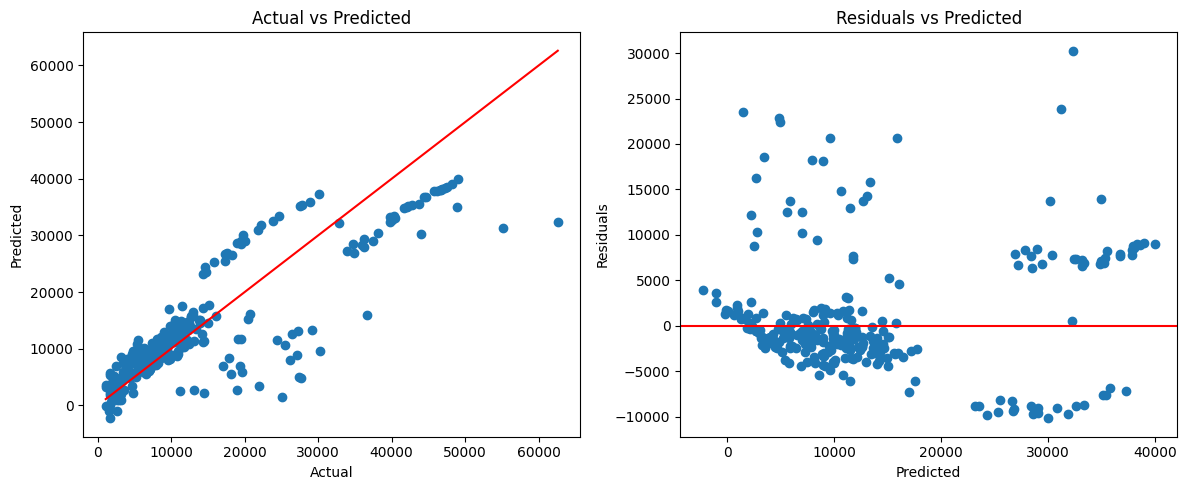

Polynomial LR



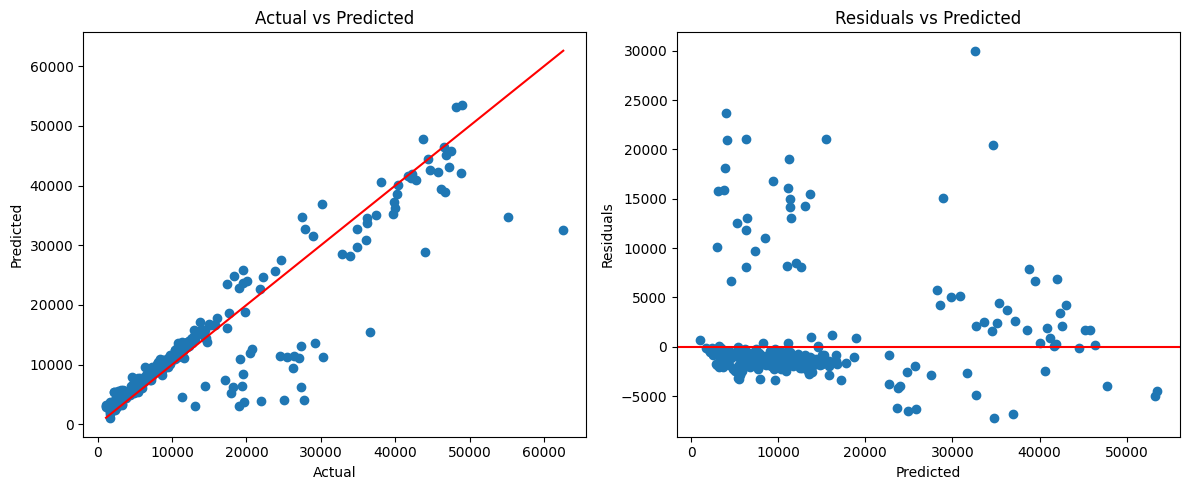

Ridge Regression



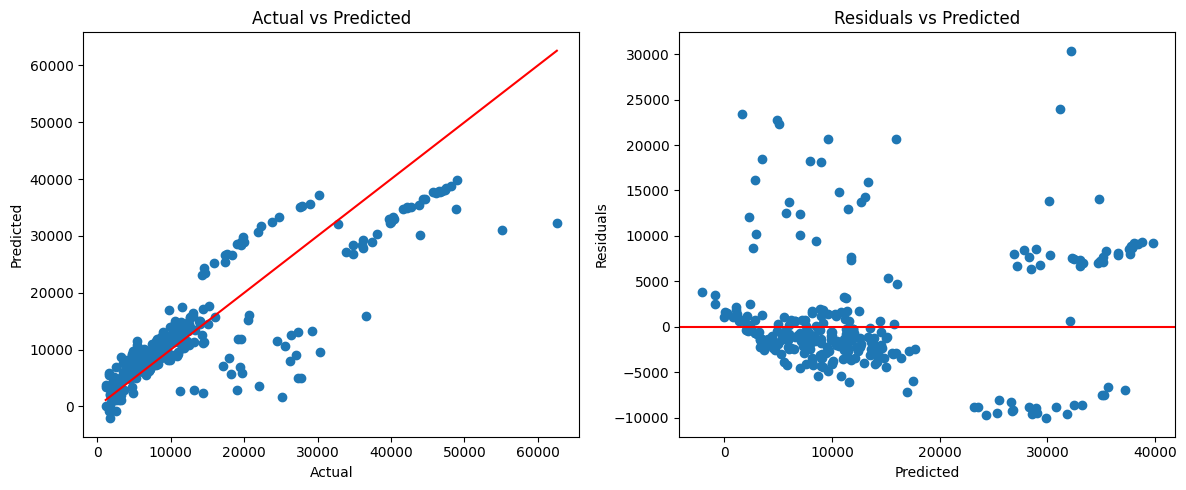

Lasso Regression



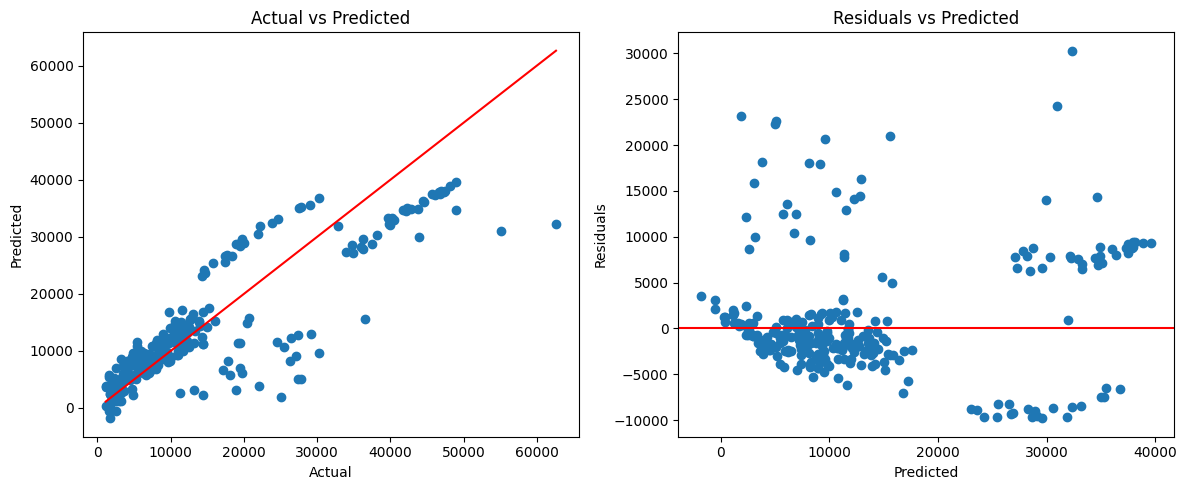

Elastic Net



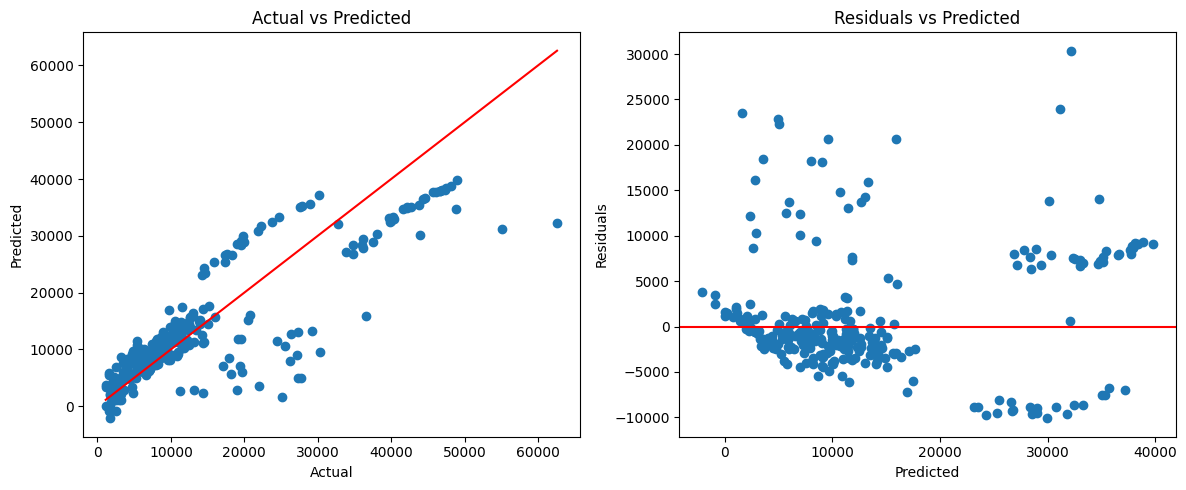

SGD Regressor



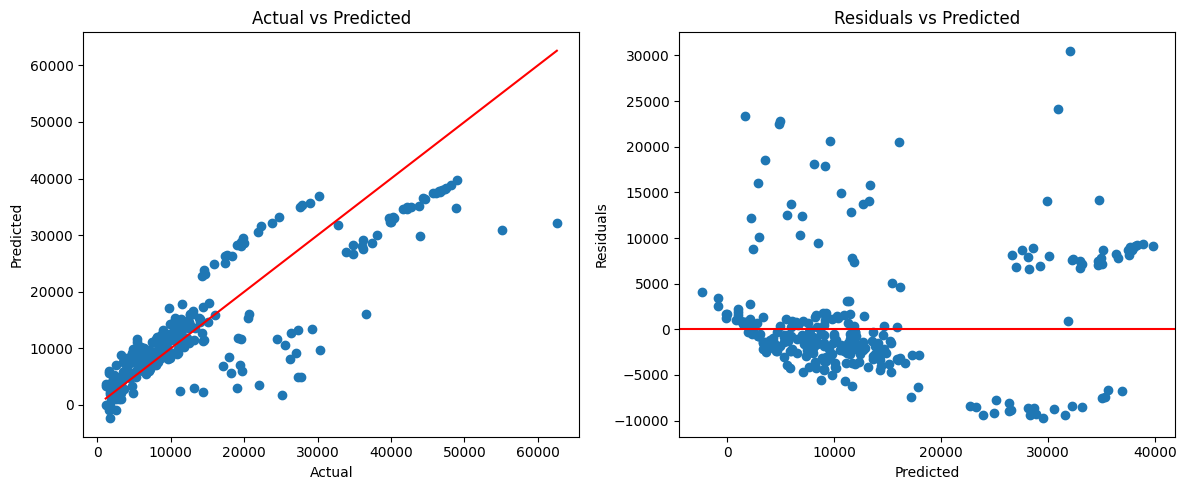

In [ ]:
trained_models = []
model_preds = []
for i in models:
    trained_model = train(i, X_train, y_train)
    trained_models.append(trained_model)

    y_pred = predict(trained_model, X_val)
    model_preds.append(y_pred)

    print(model_names[models.index(i)],end="\n\n")
    plot_actual_vs_predicted(y_val, y_pred)

## Evaluation Metrics

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

def evaluate_regression(y_true, y_pred, n_features):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    adj_r2 = adjusted_r2(r2, len(y_true), n_features)

    return {
        "R2": r2,
        "Adjusted_R2": adj_r2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

for i in range(len(model_names)):
    print(model_names[i])
    print(evaluate_regression(y_val, model_preds[i], 11))

# for i,j in zip(model_names, model_preds):
#   print(i)
#   print(evaluate_regression(y_val, j, 11))


Linear regression
{'R2': 0.7285782705222769, 'Adjusted_R2': 0.716915618083781, 'MAE': 4571.216898620719, 'MSE': 45742490.45766306, 'RMSE': np.float64(6763.3194851095905)}
Polynomial LR
{'R2': 0.8118445296617154, 'Adjusted_R2': 0.8037597242956172, 'MAE': 3175.0781144816838, 'MSE': 31709693.336150084, 'RMSE': np.float64(5631.136060880618)}
Ridge Regression
{'R2': 0.7279705053353067, 'Adjusted_R2': 0.7162817379864332, 'MAE': 4578.780840694283, 'MSE': 45844916.64630675, 'RMSE': np.float64(6770.887434177795)}
Lasso Regression
{'R2': 0.7271166288738415, 'Adjusted_R2': 0.7153911715207644, 'MAE': 4572.33397623658, 'MSE': 45988819.77434942, 'RMSE': np.float64(6781.505715867931)}
Elastic Net
{'R2': 0.7280970544773855, 'Adjusted_R2': 0.7164137247869606, 'MAE': 4577.285677496113, 'MSE': 45823589.41898746, 'RMSE': np.float64(6769.312329844698)}
SGD Regressor
{'R2': 0.7269317892096406, 'Adjusted_R2': 0.7151983895272425, 'MAE': 4620.18679162004, 'MSE': 46019970.657486804, 'RMSE': np.float64(6783.8020

#### For dummy hyperparameters before tuning -

Polynomial Features: Degree = 2

Ridge: Alpha = 0.1

Lasso: Alpha = 0.1, max_iter = 5000

Elastic Net = Alpha = 0.1, l1_ratio = 0.5, max_iter = 5000

SGD = alpha = 0.0001, max_iter= 5000, tol = 1e-3

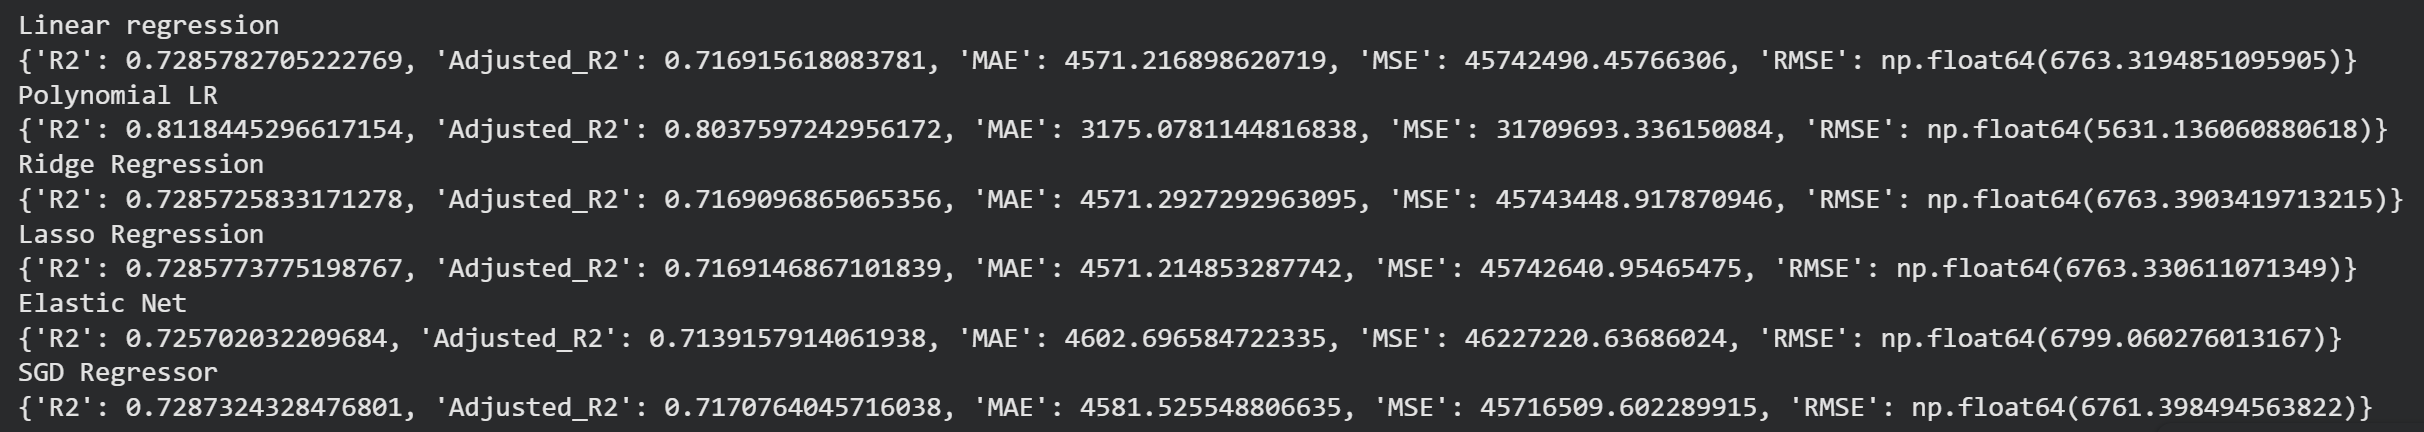

## Metrics Plot -

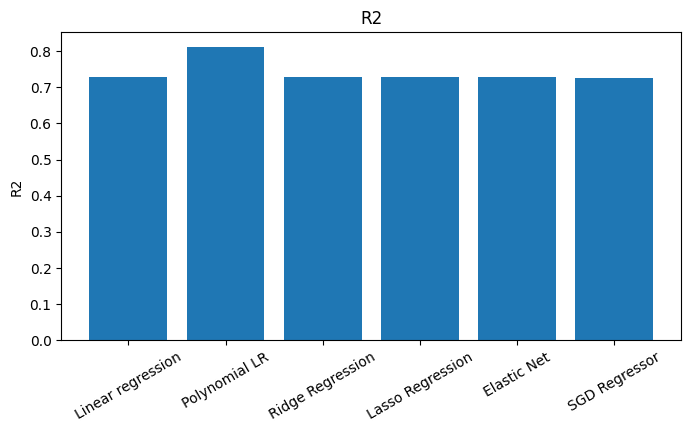

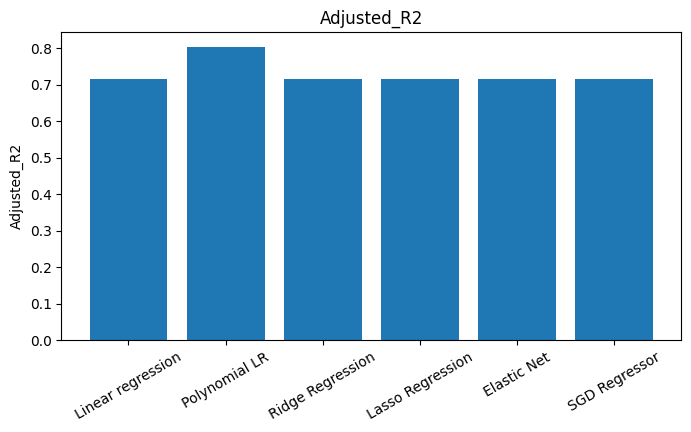

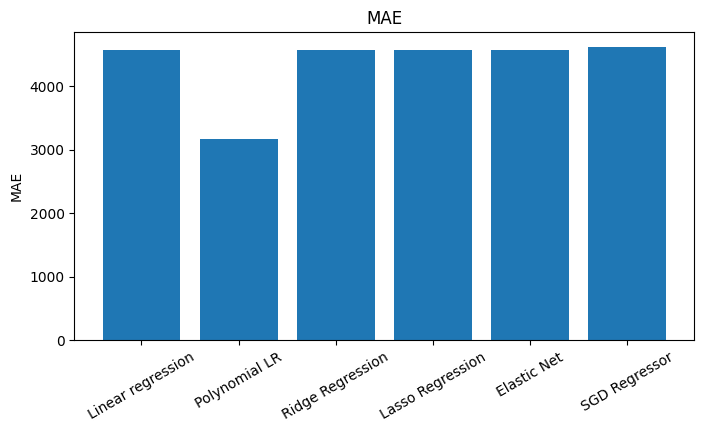

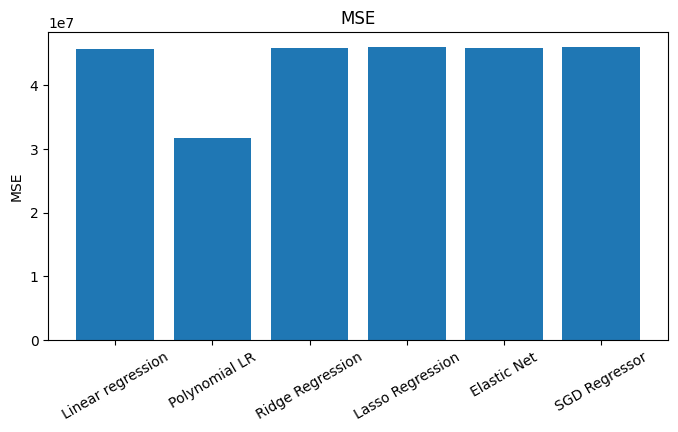

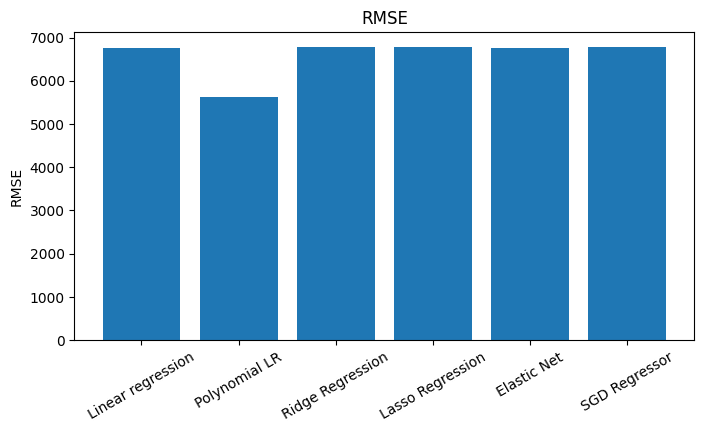

In [ ]:
results = []

for i in range(len(model_names)):
    metrics = evaluate_regression(y_val, model_preds[i], 11)
    metrics["Model"] = model_names[i]
    results.append(metrics)

results_df = pd.DataFrame(results)
results_df

metrics = ["R2", "Adjusted_R2", "MAE", "MSE", "RMSE"]

for metric in metrics:
    plt.figure(figsize=(8, 4))
    plt.bar(results_df["Model"], results_df[metric])
    plt.title(metric)
    plt.xticks(rotation=30)
    plt.ylabel(metric)
    plt.show()


## Hyper Parameter Tuning -

### Linear and Polynomial Reg

In [ ]:


from sklearn.model_selection import GridSearchCV

param_grid = {
    "polynomialfeatures__degree": [1, 2, 3, 4, 5],
    "linearregression__fit_intercept": [True, False]
}

# Grid search
grid_poly = GridSearchCV(
    poly_lr_pipeline,
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

# Train only on training data
grid_poly.fit(X_train, y_train)

print("Best Ridge params:", grid_poly.best_params_)
print("Best CV R2:", grid_poly.best_score_)

Best Ridge params: {'linearregression__fit_intercept': True, 'polynomialfeatures__degree': 2}
Best CV R2: 0.8379065429413556


### Ridge Regression

In [ ]:


ridge_param_grid = {
    "ridge__alpha": [0.001, 0.01, 0.1, 1, 10, 100]
}

ridge_gs = GridSearchCV(
    ridge_pipeline,
    param_grid=ridge_param_grid,
    cv=5,
    scoring="r2"
)

ridge_gs.fit(X_train, y_train)

print("Best Ridge params:", ridge_gs.best_params_)
print("Best CV R2:", ridge_gs.best_score_)


Best Ridge params: {'ridge__alpha': 10}
Best CV R2: 0.7374784680963968


### Lasso Regression

In [ ]:


param_grid = {
    "lasso__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

# Grid search with cross-validation
grid_lasso = GridSearchCV(
    lasso_pipeline,
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

# Train on training data only
grid_lasso.fit(X_train, y_train)

print("Best Ridge params:", grid_lasso.best_params_)
print("Best CV R2:", grid_lasso.best_score_)


Best Ridge params: {'lasso__alpha': 100}
Best CV R2: 0.7388530696864912


### Elastic Net Regression

In [ ]:


param_grid = {
    "elasticnet__alpha": [0.001, 0.01, 0.1, 1],
    "elasticnet__l1_ratio": [0.0001, 0.01, 0.05, 0.1, 0.2, 0.5, 0.8]
}

# Grid search
grid_enet = GridSearchCV(
    elastic_net_pipeline,
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

# Train only on training data
grid_enet.fit(X_train, y_train)

print("Best Ridge params:", grid_enet.best_params_)
print("Best CV R2:", grid_enet.best_score_)

Best Ridge params: {'elasticnet__alpha': 0.01, 'elasticnet__l1_ratio': 0.0001}
Best CV R2: 0.7374759153363256


### SGD regression -

Since, SGD regressor uses stochastic optimization, unlike other regressions which use deterministic method to find optimal value, it causes different optimal hyperparameters on every run.

In [ ]:
# SGD reg -

param_grid = {
    "sgdregressor__alpha": [0.0001, 0.001, 0.01],
    "sgdregressor__penalty": ["l2", "l1", "elasticnet"],
    "sgdregressor__learning_rate": ["constant", "optimal", "adaptive"]
}

grid_sgd = GridSearchCV(
    sgdregressor_pipeline,
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid_sgd.fit(X_train, y_train)

print("Best Ridge params:", grid_sgd.best_params_)
print("Best CV R2:", grid_sgd.best_score_)


Best Ridge params: {'sgdregressor__alpha': 0.01, 'sgdregressor__learning_rate': 'adaptive', 'sgdregressor__penalty': 'elasticnet'}
Best CV R2: 0.7375374077668052
